In [1]:
import pandas as pd 
import numpy as np 
import matplotlib as plt 
%matplotlib inline

In [2]:
bar = pd.read_csv('/Users/arturdanyliv/Downloads/course-files/weather_barcelona.csv',index_col='Date')

In [3]:
rom = pd.read_csv('/Users/arturdanyliv/Downloads/course-files/weather_rome.csv',index_col='Date')

In [4]:
ams = pd.read_csv('/Users/arturdanyliv/Downloads/course-files/weather_amsterdam.csv',index_col='Date')

In [5]:
temp_max = pd.DataFrame(index = bar.index)

In [6]:
temp_max['Barcelona'] = bar['TempMax']
temp_max['Rome'] = rom['TempMax']
temp_max['Amsterdam'] = ams['TempMax']

In [7]:
def GradeDay(row):
    if(row["TempMax"] >= row['AvgTempMax']):
        return 'PLUS'
    else:
        return "MINUS"

In [9]:
rom.head()

,TempMax,TempMin,Rain,AvgTempMax,AvgTempMin,GradeDay
Date,,,,,,
2018-01-01,14,8,0,12,4,PLUS
2018-01-02,13,7,0,12,4,PLUS
2018-01-03,14,1,0,12,4,PLUS
2018-01-04,16,6,0,12,4,PLUS
2018-01-05,17,7,0,12,3,PLUS


In [10]:
rom['GradeDay'].value_counts()

PLUS     70
MINUS    20
Name: GradeDay, dtype: int64

In [12]:
cities3 = pd.DataFrame(index=['MINUS','PLUS'])

In [13]:
cities3['Barcelona'] = bar['GradeDay'].value_counts()

In [14]:
cities3['Rome'] = rom['GradeDay'].value_counts()

In [15]:
cities3['Amsterdam'] = ams['GradeDay'].value_counts()

In [16]:
cities3

,Barcelona,Rome,Amsterdam
MINUS,26,20,22
PLUS,64,70,68


<Axes: >

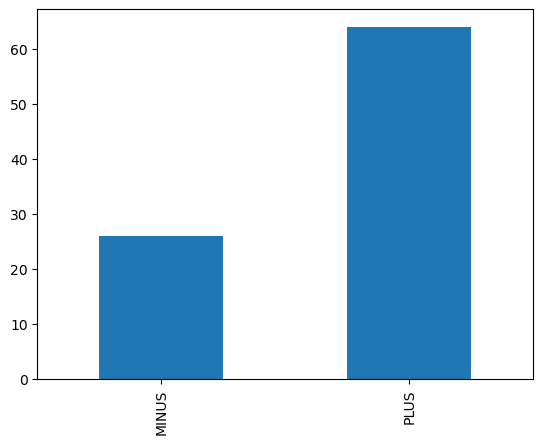

In [17]:
cities3['Barcelona'].plot(kind='bar')
# tylko i wylacznie dla kolumny Barcelona sporzdzamy slupki 
# mamy tylko 2 wartosci - i +
# mozna zmienic tytul legende colory i td

<Axes: >

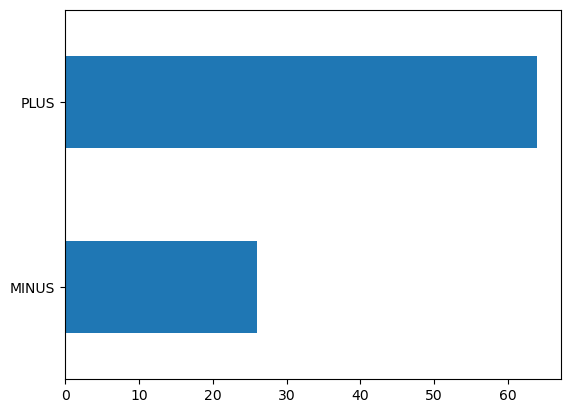

In [18]:
cities3['Barcelona'].plot(kind='barh')
# zeby poziomo przedstawic wykres barh
# podpisy pod kolumnami sa ulozone poziomo 

<Axes: >

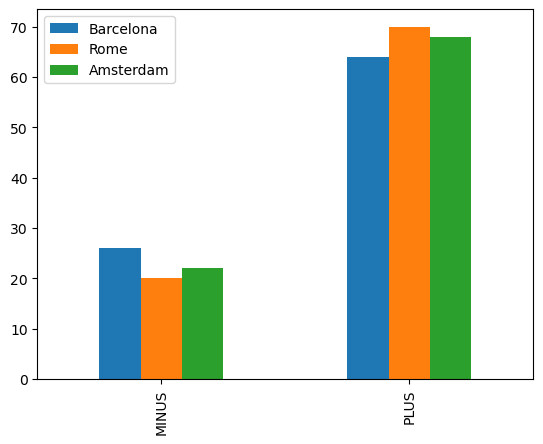

In [19]:
cities3.plot(kind='bar')
# nasz obiekt DataFrame jest dla 3 miast 

<Axes: >

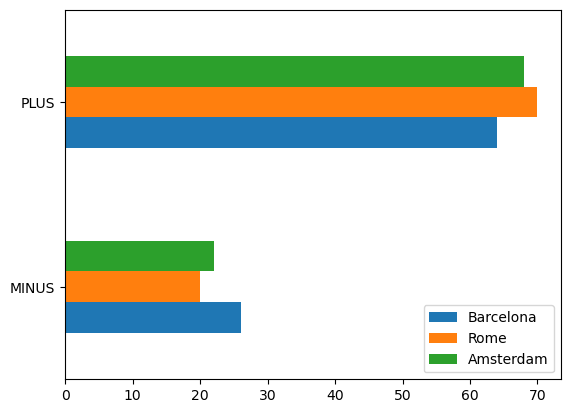

In [20]:
cities3.plot(kind='barh')

<Axes: >

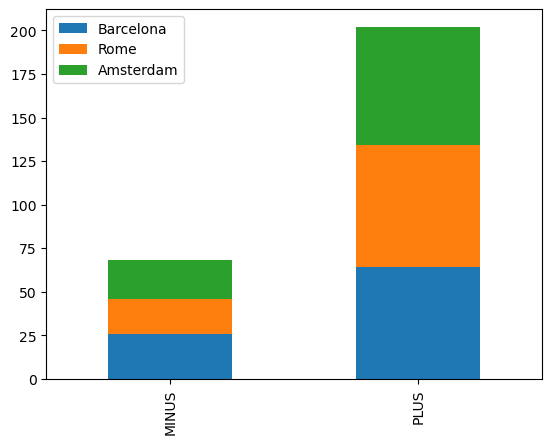

In [21]:
cities3.plot(kind='bar',stacked=True)
# Aby slupki byly nalozone jeden na drugi  ----> stacked=True
# mamy tylko 2 kolumny 

<Axes: >

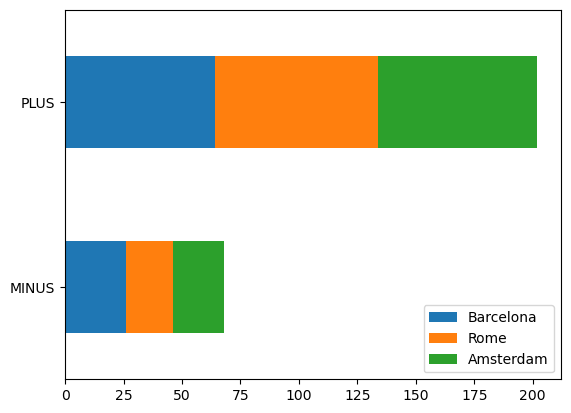

In [22]:
cities3.plot(kind='barh',stacked=True)
# wykres słupkowy poziomowy

In [23]:
temp_max
# min dla kazdego z tych miast mediane miediane mediany (mediane to pol )(mediana mediany kwartyl)

,Barcelona,Rome,Amsterdam
Date,,,
2018-01-01,17,14,8
2018-01-02,19,13,9
2018-01-03,23,14,11
2018-01-04,24,16,11
2018-01-05,20,17,8
...,...,...,...
2018-03-27,16,16,10
2018-03-28,20,17,8
2018-03-29,17,19,11


<Axes: >

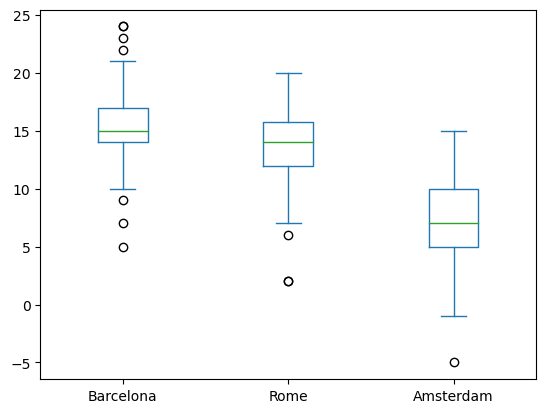

In [24]:
temp_max.plot(kind='box')
# jest podzielone na dwieczesci zielona kreska to mediana :
#.  polowa analizowanych dni byla chlodniejsza 
#.  a polowa to byla cieplejsza 
#.   z pudelka wystaja lasy : gorny las wskazuje na wartosc max a dalony na wartosc minimalna w zbiorze danych 
#.    od koncuwki tego lasa zaczynamy kwartyli , kwartyle pozwalaja podzielic na 4 rowne czesci 
#.    1 kwartyl to 1/4 zbioru ktora charakterezuje sie najnizszymi temperaturami 
#.    2 kwartyl to 1/4 zbioru ktora charakterezuje nie co wyzszymi temperaturami lae mniejsze od mediany 
#.    3 kwartal to 1/4 danych posiada wyzsze temperatury od mediany 
#.    4 k wartal najwyzsze temperatury 
#.     Niskie pudelko krotkie lase bedzie mowic , ze wartosci sa dosyc skupione znajduja sie dosyc blisko mediany 
#.     Wysokie pudelko i dlugie lasy wskazuja , ze pogoda jest nie stabilna raz bedzie bardzo cieplo a innym razem bardzo zimno 

In [25]:
color = dict(boxes='DarkGreen',whiskers='DarkOrange',medians='DarkBlue',caps='Gray')
# jestesmy w stanie wplywac jak konkretnie ten wykres jest zbudowany jak on wyglada 
# zeby cos zmodyfikowac trzeba bedzie najpierw zrobic odpowidni slownik

# boxes --> pudelka ciemno zielone 
# whiskers --> lasy beda pomaranczowe 
# medians --> kreseczka ciemno niebieska 
# caps --> wartosc minimalna i max maja byc narysowane szarym kolorem 

<Axes: >

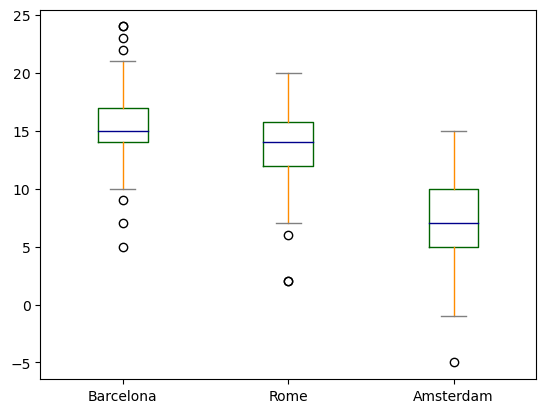

In [26]:
temp_max.plot(kind='box',color=color)
# wlasciwosci tego wykresu przpiszemy pelne cechy 

<Axes: ylabel='Frequency'>

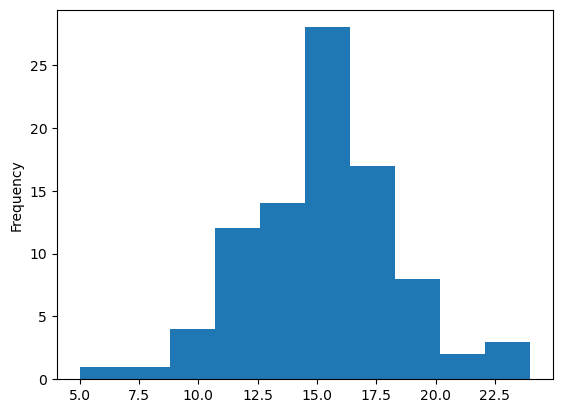

In [27]:
bar['TempMax'].plot(kind='hist')
# ostatni rodaj wykresu to HISTOGRAM
# dla mista Barcelona dla serii danych opisujace max temperature odnotywona dla poszczegolnych dni 
# GISTOGRAM moze miec rozny krztalt 

# Kazdy z tych slupkol odpowiada na pytanie ile bylo wykonanych takich pomiarow ze temperatura byla taka jak na osi x 
# najwiecej dni w Barcelona charakterezowalo sie jako 15 stopni i bylo to ponad 25 dni i pozostale dni 7,5 10 12,5 sopni 
#

In [28]:
bar['TempMax'].value_counts().sort_index()
# licznik poszczegolnych temperatur ktore w tym miescie byly mierzone 
# 3 pomiary dla 10 stopni i td 
# mniej wiecej przedstawia wartosci danych 

5      1
7      1
9      1
10     3
11     4
12     8
13     4
14    10
15    17
16    11
17     9
18     8
19     4
20     4
21     1
22     1
23     1
24     2
Name: TempMax, dtype: int64

In [29]:
bar['TempMax'].nunique()
# zeby pokazal doklanie to samo co jest w naszym zestawieniu 
# ile powinno postac slupkow --> nunique() --> 18 slopkow

18

<Axes: ylabel='Frequency'>

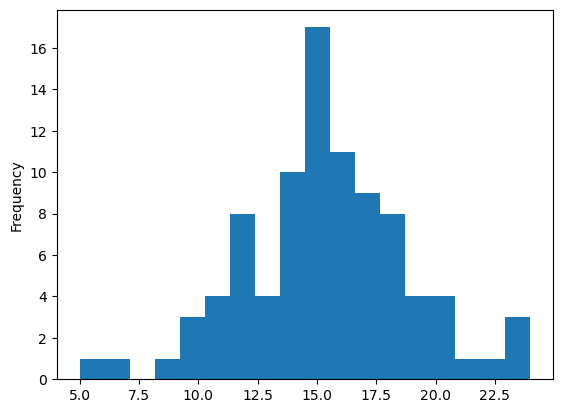

In [30]:
bar['TempMax'].plot(kind='hist',bins=18)
# bins buduje 18 slupkow --> bardziej wiarygodny histogram 